# CS109a Final Project: Group 90 <br>Predicting damage of US storms<br>
### Data Science 1: CS 109A/STAT 121A/AC 209A/ E 109A <br> Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave
#### Harvard University <br> Fall 2017 <br> 
#### Date: December 7, 2017<br> Written By: George Hu, Manav Khandelwal, Josh Kuppersmith Evan Mackay <br> 

---




In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# from zipcode
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import time
import copy
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor

# Part 1: Loading In Data

In [3]:
# load in all data for 2016 and 2017

details_2016 = pd.read_csv('Details_2016.csv')
details_2017 = pd.read_csv('Details_2017.csv')
locations_2016 = pd.read_csv('Locations_2016.csv')
locations_2017 = pd.read_csv('Locations_2017.csv')
#fatalities_2016 = pd.read_csv('Fatalities_2016.csv')
#fatalities_2017 = pd.read_csv('Fatalities_2017.csv')

details_2016.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


In [4]:
# vertically merge

details = pd.concat([details_2016, details_2017])
locations = pd.concat([locations_2016, locations_2017])
#fatalities = pd.concat([fatalities_2016, fatalities_2017])

print(details.shape)

details.head()

(103177, 51)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201607,15,1715,201607,15,1715,108769,651823,SOUTH CAROLINA,45,2016,July,Heavy Rain,C,91,YORK,GSP,15-JUL-16 17:15:00,EST-5,15-JUL-16 17:15:00,0,0,0,0,2.00K,0.00K,Social Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,BOYD HILL,1.0,N,BOYD HILL,34.94,-81.03,34.94,-81.03,Scattered thunderstorms developed across the U...,One to two feet of deep standing water develop...,CSV
1,201607,15,1725,201607,15,1725,108769,651825,SOUTH CAROLINA,45,2016,July,Thunderstorm Wind,C,91,YORK,GSP,15-JUL-16 17:25:00,EST-5,15-JUL-16 17:25:00,0,0,0,0,0.00K,0.00K,NWS Employee,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,S,FT MILL,1.0,S,FT MILL,35.01,-80.93,35.01,-80.93,Scattered thunderstorms developed across the U...,NWS Columbia relayed a report of trees blown d...,CSV
2,201607,16,1246,201607,16,1246,108812,651828,NORTH CAROLINA,37,2016,July,Thunderstorm Wind,C,111,MCDOWELL,GSP,16-JUL-16 12:46:00,EST-5,16-JUL-16 12:46:00,0,0,0,0,0.00K,0.00K,Broadcast Media,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,ENE,OLD FT,2.0,ENE,OLD FT,35.64,-82.14,35.64,-82.14,Scattered thunderstorms developed near the Blu...,Media reported two trees blown down along I-40...,CSV
3,201607,8,1755,201607,8,1755,105872,635287,TENNESSEE,47,2016,July,Thunderstorm Wind,C,105,LOUDON,MRX,08-JUL-16 17:55:00,EST-5,08-JUL-16 17:55:00,0,0,0,0,NaN,NaN,Public,50.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,JENA,1.0,W,JENA,35.65,-84.18,35.65,-84.18,The combination of summer heating and high low...,Numerous trees were reported down in the Green...,CSV
4,201607,8,1810,201607,8,1810,105872,635296,TENNESSEE,47,2016,July,Thunderstorm Wind,C,155,SEVIER,MRX,08-JUL-16 18:10:00,EST-5,08-JUL-16 18:10:00,0,0,0,0,NaN,NaN,State Official,60.0,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WSW,PITNER,1.0,WSW,PITNER,35.87,-83.77,35.87,-83.77,The combination of summer heating and high low...,Numerous trees were reported down in Seymour. ...,CSV


# Part 2: Preliminary Data Analysis and Cleaning

In [5]:
# look at column names

print(list(details.columns))
print()
print(list(locations.columns))
print()

['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE']

['YEARMONTH', 'EPISODE_ID', 'EVENT_ID', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2']



In [6]:
# merge details and location data

data = pd.merge(details, locations, how='inner', on=['EVENT_ID'])
print(data.shape)
data.head()

## NOTE: possibility to merge on fatalities, but there are very few (766) so this would be a special case model
## perhaps use for some final added analysis
## data = pd.merge(data1, fatalities, how='inner', on=['EVENT_ID'])


(87563, 61)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.00K,0.00K,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,201603,102911,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1.00K,0.00K,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,201603,102911,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.00K,0.00K,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,201607,108811,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.00K,0.00K,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,201607,108811,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.00K,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,201607,108811,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032


In [7]:
# make sure that these are the same
print(details[details['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])

print(details[details['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])


76    1.00K
Name: DAMAGE_PROPERTY, dtype: object
1    1.00K
Name: DAMAGE_PROPERTY, dtype: object
86    0.00K
Name: DAMAGE_PROPERTY, dtype: object
3    0.00K
Name: DAMAGE_PROPERTY, dtype: object


In [8]:
# re-format Property and Crop Damage

print(data['DAMAGE_PROPERTY'][data['DAMAGE_PROPERTY'].isnull()].size)

damage_property = []
for i in data["DAMAGE_PROPERTY"]:
    try:
        dam = float(i.split('K')[0])*1000.0
        damage_property.append(dam)
    except:
        try:
            dam = float(i.split('M')[0])*1000000.0
            damage_property.append(dam)
        except:
            try:
                dam = float(i.split('B')[0])*1000000000.0
                damage_property.append(dam)
            except:
                try:
                    dam = float(i)*1.0
                    damage_property.append(dam)
                except:
                    print(i)
                    
data["DAMAGE_PROPERTY"] = damage_property

# still a bunch of nulls
print(data['DAMAGE_PROPERTY'][data['DAMAGE_PROPERTY'].isnull()].size)

data.head()

11870
11870


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.0,0.00K,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,201603,102911,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1000.0,0.00K,Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,201603,102911,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.0,0.00K,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,201607,108811,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.0,0.00K,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,201607,108811,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.0,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,201607,108811,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032


In [9]:
# should still match up
print(details[details['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 619253]['DAMAGE_PROPERTY'])

print(details[details['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])
print(data[data['EVENT_ID'] == 651844]['DAMAGE_PROPERTY'])


76    1.00K
Name: DAMAGE_PROPERTY, dtype: object
1    1000.0
Name: DAMAGE_PROPERTY, dtype: float64
86    0.00K
Name: DAMAGE_PROPERTY, dtype: object
3    0.0
Name: DAMAGE_PROPERTY, dtype: float64


In [10]:
print(len(data))
data = data.dropna(axis=0, subset=['DAMAGE_PROPERTY'])
print(len(data))

data['DAMAGE_PROPERTY'].head()

87563
75693


0       0.0
1    1000.0
2       0.0
3       0.0
4       0.0
Name: DAMAGE_PROPERTY, dtype: float64

In [11]:
# Make new categorical column for has_damage

has_damage = []
for x in data['DAMAGE_PROPERTY']:
    if x > 0.0:
        has_damage.append(1)
    else:
        has_damage.append(0)

data['HAS_DAMAGE'] = has_damage
data['HAS_DAMAGE'].head()

0    0
1    1
2    0
3    0
4    0
Name: HAS_DAMAGE, dtype: int64

In [13]:
# expecting yes, no
print(data[data['EVENT_ID'] == 619253]['HAS_DAMAGE'])
print(data[data['EVENT_ID'] == 651844]['HAS_DAMAGE'])

1    1
Name: HAS_DAMAGE, dtype: int64
3    0
Name: HAS_DAMAGE, dtype: int64


# Part 3: Some of our EDA

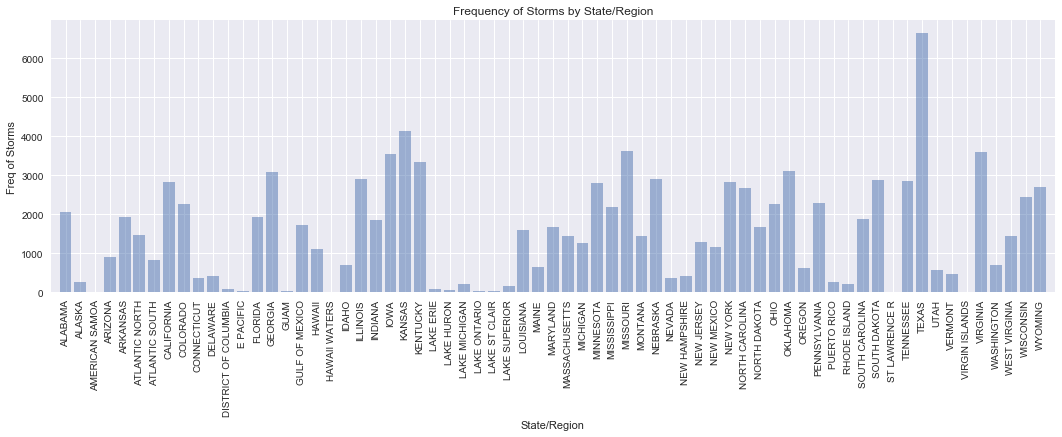

In [14]:
# storm counts by state

import seaborn as sns
sns.set(color_codes=True)
storm_counts_loc = np.unique(details['STATE'], return_counts=True)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(67), storm_counts_loc[1], align='center', alpha=0.5)
ax.set_xlim([-1, 67])
ax.set_xticks(range(67))
ax.set_xticklabels(storm_counts_loc[0], rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by State/Region')

plt.show()

(array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'], dtype=object), array([10699,  9110,  4514,  8680,  8563, 16912, 13249, 10688, 13064,
        2066,  2349,  3283]))


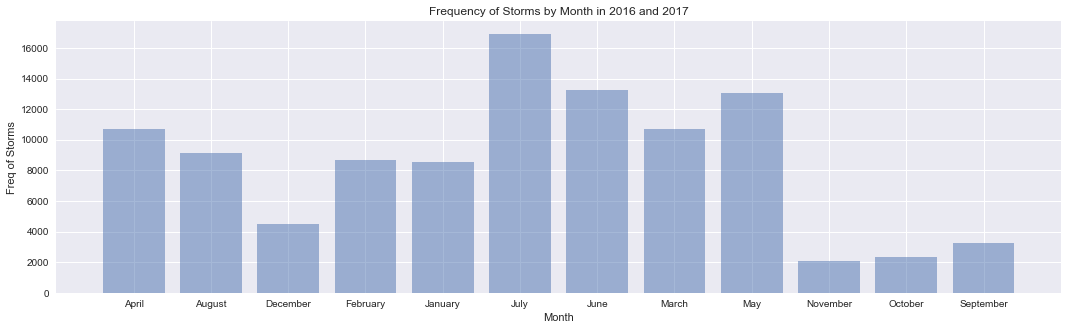

In [13]:
# storm count by month

storm_counts_mo = np.unique(details['MONTH_NAME'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(12), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Month')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Month in 2016 and 2017')

plt.show()

(array([2016, 2017]), array([55964, 47213]))


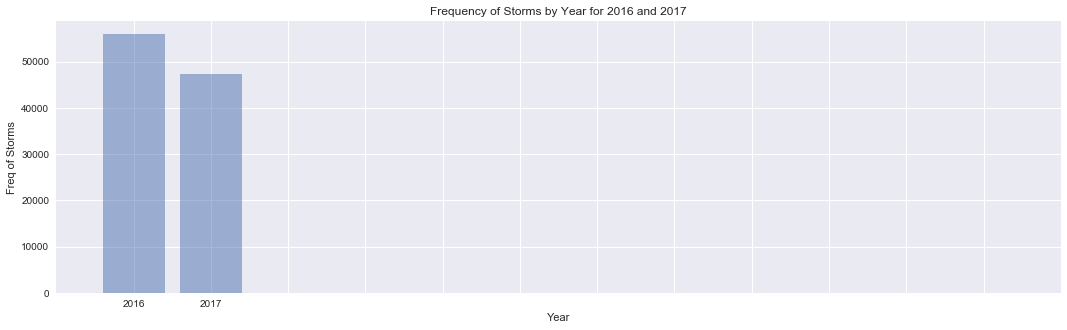

In [14]:
# storm count by year

storm_counts_mo = np.unique(details['YEAR'], return_counts=True)
print(storm_counts_mo)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(2), storm_counts_mo[1], align='center', alpha=0.5)
ax.set_xlim([-1, 12])
ax.set_xticks(range(12))
ax.set_xticklabels(storm_counts_mo[0], rotation=0)
ax.set_xlabel('Year')
ax.set_ylabel('Freq of Storms')
ax.set_title('Frequency of Storms by Year for 2016 and 2017')

plt.show()

In [15]:
# EDA, out of storms with damage, where are they occuring

damage_data = data[data['HAS_DAMAGE'] == 1]
print(len(damage_data))

26263


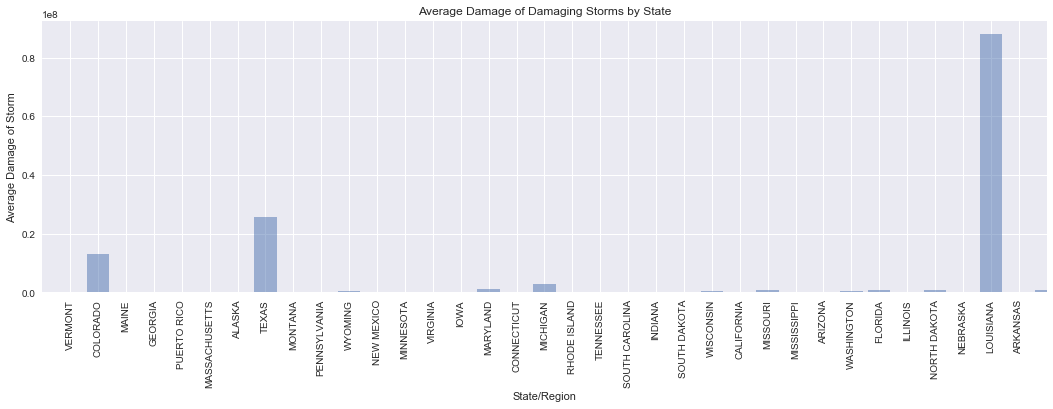

In [16]:
# display average damage per state given causes damage

sns.set(color_codes=True)

states = list(set(damage_data['STATE'].values))

states_final = []
ave_per_state = []
for i in range(len(states)):
    state = states[i]
    state_damage = damage_data[damage_data['STATE'] == state]['DAMAGE_PROPERTY']
    if len(state_damage) > 10:
        ave = np.mean(state_damage)
        states_final.append(state)
        ave_per_state.append(ave)
        
# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(ave_per_state)), ave_per_state, align='center', alpha=0.5)
ax.set_xlim([-1, 35])
ax.set_xticks(range(35))
ax.set_xticklabels(states_final, rotation=90)
ax.set_xlabel('State/Region')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by State')

plt.show()

['Waterspout', 'Flash Flood', 'Thunderstorm Wind', 'Hail', 'Debris Flow', 'Marine Strong Wind', 'Funnel Cloud', 'Dust Devil', 'Heavy Rain', 'Tornado', 'Flood', 'Lightning', 'Marine Thunderstorm Wind']


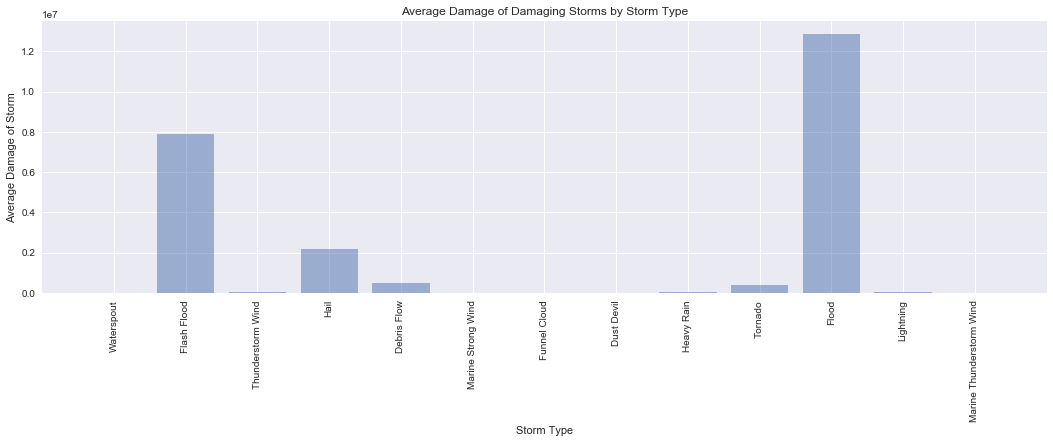

In [17]:
# display average damage per storm type given causes damage

sns.set(color_codes=True)

storm_types = list(set(damage_data['EVENT_TYPE'].values))
print(storm_types)

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = damage_data[damage_data['EVENT_TYPE'] == storm]['DAMAGE_PROPERTY']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

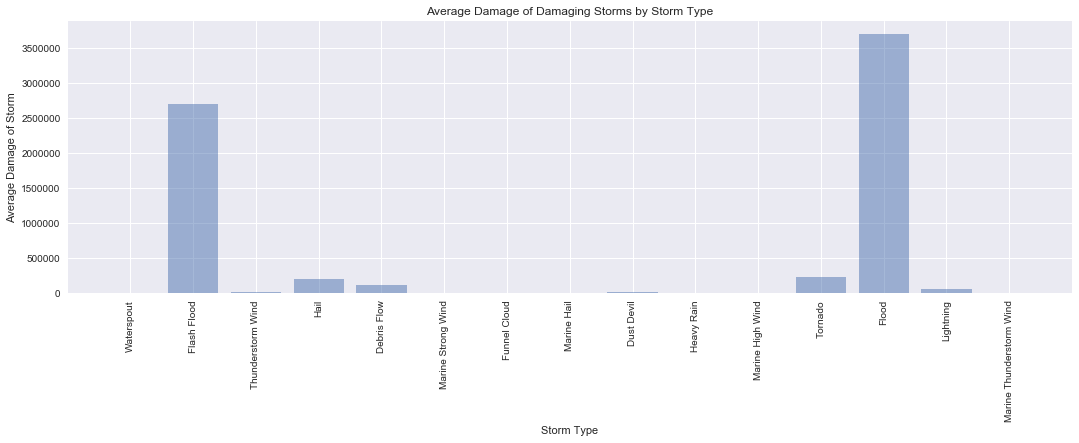

In [18]:
# display average damage per storm type without conditioning on damage causing

sns.set(color_codes=True)

storm_types = list(set(data['EVENT_TYPE'].values))

ave_per_storm = []
for i in range(len(storm_types)):
    storm = storm_types[i]
    storm_damage = data[data['EVENT_TYPE'] == storm]['DAMAGE_PROPERTY']
    ave = np.mean(storm_damage)
    ave_per_storm.append(ave)

# plot this info
fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.bar(range(len(storm_types)), ave_per_storm, align='center', alpha=0.5)
ax.set_xlim([-1, len(storm_types)])
ax.set_xticks(range(len(storm_types)))
ax.set_xticklabels(storm_types, rotation=90)
ax.set_xlabel('Storm Type')
ax.set_ylabel('Average Damage of Storm')
ax.set_title('Average Damage of Damaging Storms by Storm Type')

plt.show()

# Part 4: More Cleaning and *Handling of Nulls*

In [15]:
# These are the storms that don't have magnitude
np.unique(data[data.MAGNITUDE.isnull()]["EVENT_TYPE"], return_counts=True)

(array(['Debris Flow', 'Dust Devil', 'Flash Flood', 'Flood', 'Funnel Cloud',
        'Heavy Rain', 'Lightning', 'Tornado', 'Waterspout'], dtype=object),
 array([  626,    18, 22544, 13463,   424,  2232,   570,  2645,   311]))

In [16]:
# drop null rows and check if any null values remaining
# MORE ROBUST

print(data.shape)
# Replace NA magnitudes with 0
data["MAGNITUDE"] = data.MAGNITUDE.fillna(value=0)
data.dropna(inplace=True, subset = ['DAMAGE_CROPS','BEGIN_YEARMONTH', 'YEAR','MAGNITUDE','LOCATION_INDEX', 'RANGE','LATITUDE', 'LONGITUDE'])      
print(data.shape)

# deleted 1500 rows

(75693, 62)
(74161, 62)


### EDA on Our Response Variable

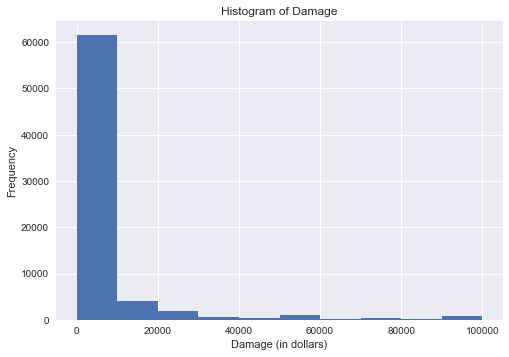

In [17]:
data["DAMAGE_PROPERTY"] = pd.Series(damage_property)
plt.hist(x=data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY <= 100000])
plt.xlabel("Damage (in dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [22]:
np.corrcoef(data["DAMAGE_PROPERTY"],data["DEATHS_DIRECT"])

array([[ 1.        ,  0.53523837],
       [ 0.53523837,  1.        ]])

In [23]:
# validation of our damage estimates
data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY > 100000].shape

(3250,)

In [18]:
import scipy.stats as ss
print("Mean: {}".format(round(np.mean(data.DAMAGE_PROPERTY)),4))
print("Median: {}".format(np.median(data.DAMAGE_PROPERTY)))
print("Skew: {}".format(round(ss.skew(data.DAMAGE_PROPERTY),2)))

Mean: 1516894
Median: 0.0
Skew: 46.4


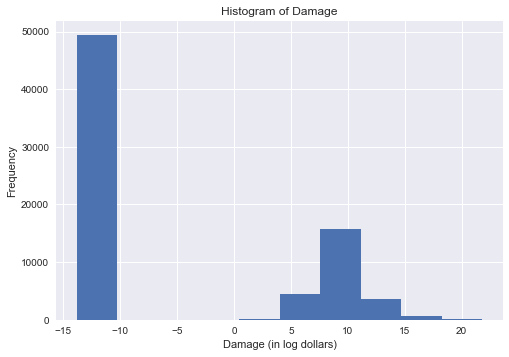

In [25]:
# we see our big concentration at 0, and a (hopefully) near-normal distribution otherwise

plt.hist(x=np.log(data.DAMAGE_PROPERTY + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

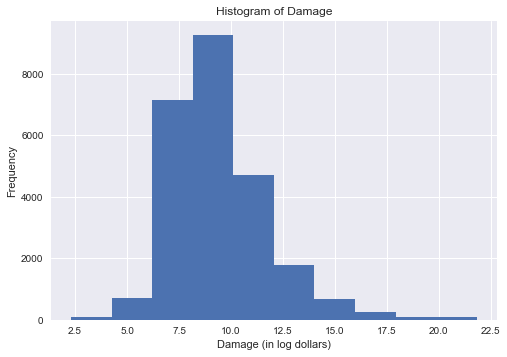

In [19]:
# confirming near-normal response for data with a damage over 0

plt.hist(x=np.log(data.DAMAGE_PROPERTY[data.DAMAGE_PROPERTY>0] + .000001))
plt.xlabel("Damage (in log dollars)")
plt.ylabel("Frequency")
plt.title("Histogram of Damage")

In [20]:
print(len(data))

74161


# Part 5: Zipcode + Demographic Data

In [ ]:
# DON'T RUN AGAIN!!

from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()

def calc_density(row):
    zipcode = search.by_coordinate(row['BEGIN_LAT'], row['BEGIN_LON'], radius=50)
    if (int(row.name) % 1000 == 0):
        print(row.name)
    try: 
        zc = zipcode[0]
        return zc.Density
    except:
        return np.nan

def calc_popul(row):
    zipcode = search.by_coordinate(row['BEGIN_LAT'], row['BEGIN_LON'], radius=50)
    try:
        zc = zipcode[0]
        return zc.Population
    except:
        return np.nan

def calc_wealth(row):
    zipcode = search.by_coordinate(row['BEGIN_LAT'], row['BEGIN_LON'], radius=50)
    try:
        zc = zipcode[0]
        return zc.Wealthy
    except:
        return np.nan

In [ ]:
# DO NOT RUN AGAIN, SINCE WE SAVE TO A CSV BELOW

data['DENSITY'] = data.apply(calc_density, axis=1)
data['POPULATION'] = data.apply(calc_popul, axis=1)
data['HH_INCOME'] = data.apply(calc_wealth, axis=1)

In [ ]:
# DO NOT RUN AGAIN

data.to_csv("model_data_full.csv")

# Part 6: More EDA

In [28]:
## Focus on EDA to see what from the zipcode data might be useful

# Part 7: Prepare Predictors + Final Cleaning

In [29]:
data.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2', 'HAS_DAMAGE'],
      dtype='object')

In [101]:
data2 = pd.read_csv('model_data_full.csv')
print(len(data2))

# should be the same
print(data.iloc[102]['EVENT_ID'])
print(data2.iloc[102]['EVENT_ID'])

data['DENSITY'] = data2['DENSITY']
data['POPULATION'] = data2['POPULATION']
data['HH_INCOME'] = data2['HH_INCOME']

print(len(data))
# Comment out if needed
data.dropna(inplace=True, subset = ['DENSITY', 'POPULATION', 'HH_INCOME'])  

print(len(data))
data.head()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (35,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


74161
615560
615563
55239
55239


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID_x,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,YEARMONTH,EPISODE_ID_y,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,LATITUDE,LONGITUDE,LAT2,LON2,HAS_DAMAGE,DENSITY,POPULATION,HH_INCOME,MONTH
0,201603,15,2316,201603,15,2316,102911,614969,WISCONSIN,55,2016,March,Hail,C,105,ROCK,MKX,15-MAR-16 23:16:00,CST-6,15-MAR-16 23:16:00,0,0,0,0,0.0,0.00K,Public,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,N,EDGERTON,1.0,N,EDGERTON,42.8400,-89.0700,42.8400,-89.0700,A deepening low pressure area tracked from Wes...,NaN,CSV,201603,102911,1,0.69,N,EDGERTON,42.8400,-89.0700,4250400,894200,0,141.581601,11512.0,18441.042391,3
1,201603,15,2239,201603,15,2300,102911,619253,WISCONSIN,55,2016,March,Lightning,C,133,WAUKESHA,MKX,15-MAR-16 22:39:00,CST-6,15-MAR-16 23:00:00,0,0,0,0,1000.0,0.00K,Law Enforcement,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NNE,HARTLAND,1.0,NNE,HARTLAND,43.1069,-88.3468,43.1069,-88.3468,A deepening low pressure area tracked from Wes...,Lightning struck a tree and then traveled into...,CSV,201603,102911,1,0.50,NNE,HARTLAND,43.1069,-88.3468,436414,8820808,1,559.564165,20799.0,31518.731189,3
2,201607,7,2137,201607,7,2137,108811,651842,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:37:00,CST-6,07-JUL-16 21:37:00,0,0,0,0,0.0,0.00K,Public,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,S,OAKLEY MUNI ARPT,11.0,S,OAKLEY MUNI ARPT,38.9686,-100.8518,38.9686,-100.8518,During the early evening a cold front moved th...,Measured size of the hail was 3.75 inches in d...,CSV,201607,108811,1,10.60,S,OAKLEY MUNI ARPT,38.9686,-100.8518,3858116,10051108,0,5.480869,2544.0,13717.889937,7
3,201607,7,2013,201607,7,2013,108811,651844,KANSAS,20,2016,July,Thunderstorm Wind,C,193,THOMAS,GLD,07-JUL-16 20:13:00,CST-6,07-JUL-16 20:13:00,0,0,0,0,0.0,0.00K,Mesonet,52.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,E,COLBY,2.0,E,COLBY,39.4001,-101.0130,39.4001,-101.0130,During the early evening a cold front moved th...,Estimated time of report from radar.,CSV,201607,108811,1,1.98,E,COLBY,39.4001,-101.0130,3924006,101780,0,13.414206,6502.0,13515.710551,7
4,201607,7,2116,201607,7,2116,108811,651857,KANSAS,20,2016,July,Hail,C,109,LOGAN,GLD,07-JUL-16 21:16:00,CST-6,07-JUL-16 21:16:00,0,0,0,0,0.0,0.00K,Emergency Manager,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,SSW,OAKLEY MUNI ARPT,6.0,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,39.0474,-100.8672,During the early evening a cold front moved th...,Golf ball size hail broke rain gauge. Estimat...,CSV,201607,108811,1,5.62,SSW,OAKLEY MUNI ARPT,39.0474,-100.8672,392844,10052032,0,5.480869,2544.0,13717.889937,7


In [102]:
def getmonth(row):
    return int(str(row["BEGIN_YEARMONTH"])[-2:])

def getyear(row):
    return int(str(row["BEGIN_YEARMONTH"])[:4])

data["MONTH"] = data.apply(getmonth,axis=1)
data["YEAR"] = data.apply(getyear,axis=1)
#data = data.drop(['Unnamed: 0',"BEGIN_YEARMONTH","END_YEARMONTH","LAT2","LON2",
#                  "YEARMONTH","CZ_FIPS","CZ_TYPE","CZ_NAME",
#                  "WFO","MAGNITUDE_TYPE","FLOOD_CAUSE",'CATEGORY', 'TOR_F_SCALE', 
#                  'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
#                  'TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME',
#                  'EPISODE_NARRATIVE', 'EVENT_NARRATIVE'],axis=1)

In [23]:
data.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'EPISODE_ID_x', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH',
       'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE', 'YEARMONTH', 'EPISODE_ID_y', 'LOCATION_INDEX', 'RANGE', 'AZIMUTH', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'LAT2', 'LON2', 'HAS_DAMAGE', 'DENSITY', 'POPULATION', 'HH_INCOME', 'MONTH'],
      dtype='object')

In [103]:
X = data.drop("HAS_DAMAGE",axis=1)
y = data['HAS_DAMAGE']

# drop 3 rows where household income is "infinity"
drop_indices = []
for i in range(len(X)):
    if not np.isfinite(X['HH_INCOME'].iloc[i]):
        drop_indices.append(i)

print(len(X))
X = X.drop(X.index[drop_indices])
y = y.drop(y.index[drop_indices])
#y = y.drop(drop_indices, axis=0)
print(len(X))


55239
55235


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(len(list(X_train.columns)))
print(len(list(X_test.columns)))

65
65


# Part 8: Preliminary Classification Model

In [105]:
# fit prelim model


        
#for col in list(X_train.columns):
#    for i in X_train[col]:
#        if not np.isfinite(i):
#            print(i)
#            print(col)

#print(list(set(X_train.columns.values)))

print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

basic_cols = ['EVENT_TYPE', 'STATE', 'MAGNITUDE', 'CZ_TIMEZONE', 'RANGE', 'LATITUDE', 'LONGITUDE']
X_train_basic = X_train[basic_cols]
X_test_basic = X_test[basic_cols]

X_train_basic = pd.get_dummies(X_train_basic, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)
X_test_basic = pd.get_dummies(X_test_basic, columns=['EVENT_TYPE', 'STATE', 'CZ_TIMEZONE'], drop_first=True)

#print(X_train[X_train.isnull().any(axis=1)].size)
#print(y_train[y_train.isnull()].size)
#print(X_test[X_test.isnull().any(axis=1)].size)
#print(y_test[y_test.isnull()].size)

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_basic, y_train)
train_pred = model.predict(X_train_basic)
test_pred = model.predict(X_test_basic)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_basic)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 36571
Num points with damage: 18668

Training Accuracy: 0.757154051936
Testing Accuracy: 0.760313802941
True Positive Rate:  0.55208675649
True Negative Rate:  0.864684565969
AUC:  0.819232696258


# Part 9: Improving Classification Model

In [106]:
# MAKE SURE INTERACTION BETWEEN MAGNITUDE AND EVENT TYPE
# BAD BASELINE!
full_cols = ['BEGIN_TIME', 'STATE', 'MONTH_NAME', 'EVENT_TYPE', 'SOURCE', 'MAGNITUDE', 'BEGIN_RANGE', 
             'RANGE', 'AZIMUTH', 'LATITUDE', 'LONGITUDE', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_full = X_train[full_cols]
X_test_full = X_test[full_cols]

X_train_full = pd.get_dummies(X_train_full, columns=['MONTH_NAME','EVENT_TYPE', 'STATE', 'AZIMUTH','SOURCE'], drop_first=True)
X_test_full = pd.get_dummies(X_test_full, columns=['MONTH_NAME','EVENT_TYPE', 'STATE', 'AZIMUTH','SOURCE'], drop_first=True)

s = set(list(X_train_full.columns))
diff = [x for x in list(X_test_full.columns) if x not in s]
print(diff)

X_test_full = X_test_full.drop(labels=diff, axis=1)

print(len(list(X_train_full.columns)))
print(len(list(X_test_full.columns)))



149
150
['SOURCE_Lifeguard']
149
149


In [107]:
# fit prelim model

print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_full, y_train)
train_pred = model.predict(X_train_full)
test_pred = model.predict(X_test_full)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_full)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 36571
Num points with damage: 18668

Training Accuracy: 0.702245521118
Testing Accuracy: 0.710226025894
True Positive Rate:  0.275386132106
True Negative Rate:  0.928183165871
AUC:  0.671344236157


## PREDICTOR INTUITION

BEGIN_TIME: time of day could be helpful, helps accuracy. think about duration! (NORMALIZE)

STATE: geographical significance (ONE-HOT) // TAKING OUT

CZ_TYPE: C is county, Z is over water, significant predictor (ONE-HOT)

YEAR: doesn't do a ton, but helps accuracy slightly (ONE-HOT)

MONTH_NAME: EDA showed months correlating with damage frequency (ONE-HOT)

WFO: weather forecast office- another way to break down geographically by main metropolitan areas (ONE-HOT)

EVENT_TYPE: type of storm. highly predictive (ONE-HOT)

LATITUDE: geographical inuition (AS IS) // TAKING OUT

LONGITUDE: geographical inuition (AS IS) // TAKING OUT

AZIMUTH: direction of storm, helps very slightly (ONE-HOT)

DENSITY: helps when normalized, not great (NORMALIZE)

POPULATION: helps when normalized, not great (NORMALIZE)

HH_INCOME: helps when normalized, not great (NORMALIZE)

In [108]:

# BETTER SELECTION OF PREDICTORS
full_cols = ['BEGIN_TIME', 'CZ_TYPE', 'YEAR',
             'WFO', 'EVENT_TYPE', 'MONTH_NAME',
             'AZIMUTH', 'DENSITY', 'POPULATION', 'HH_INCOME']#,'MAGNITUDE', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_full = X_train[full_cols]
X_test_full = X_test[full_cols]

# normalize the numerical predictors
for i in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    train_mean = X_train_full[i].mean()
    train_sd = X_train_full[i].std()
    X_train_full[i] = (X_train_full[i] - train_mean) / train_sd
    X_test_full[i] = (X_test_full[i] - train_mean) / train_sd

X_train_full = pd.get_dummies(X_train_full, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)
X_test_full = pd.get_dummies(X_test_full, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)

print(len(list(X_train_full.columns)))
print(len(list(X_test_full.columns)))

s = set(list(X_train_full.columns))
diff = [x for x in list(X_test_full.columns) if x not in s]
print(diff)

X_test_full = X_test_full.drop(labels=diff, axis=1)

print(len(list(X_train_full.columns)))
print(len(list(X_test_full.columns)))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


165
166
['WFO_REV']
165
165


In [109]:
print("Num points without damage: " + str(len(data[data['HAS_DAMAGE'] == 0])))
print("Num points with damage: " + str(len(data[data['HAS_DAMAGE'] == 1])))

model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_full, y_train)

train_pred = model.predict(X_train_full)
test_pred = model.predict(X_test_full)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_full)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

Num points without damage: 36571
Num points with damage: 18668

Training Accuracy: 0.822438998027
Testing Accuracy: 0.82005705508
True Positive Rate:  0.696845218534
True Negative Rate:  0.881815186954
AUC:  0.888859722607


## ADDING COMPLEX EFFECTS

In [110]:
import copy

# MAKE SURE INTERACTION BETWEEN MAGNITUDE AND EVENT TYPE
X_train_complex = copy.deepcopy(X_train_full)
X_test_complex = copy.deepcopy(X_test_full)


# hardcode interaction term
for event_type in ['EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood', 
            'EVENT_TYPE_Funnel Cloud', 'EVENT_TYPE_Hail', 'EVENT_TYPE_Heavy Rain', 
            'EVENT_TYPE_Lightning', 'EVENT_TYPE_Marine Hail', 'EVENT_TYPE_Marine High Wind', 
            'EVENT_TYPE_Marine Strong Wind', 'EVENT_TYPE_Marine Thunderstorm Wind', 
            'EVENT_TYPE_Thunderstorm Wind', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Waterspout']:
    X_train_complex[event_type + "*MAGNITUDE"] = X_train_complex[event_type]*X_train["MAGNITUDE"]
    X_test_complex[event_type + "*MAGNITUDE"] = X_test_complex[event_type]*X_test["MAGNITUDE"]
    
X_train_complex["HH_INCOME*DENSITY"] = X_train_complex["DENSITY"]*X_train_complex["HH_INCOME"]
X_train_complex["HH_INCOME*POPULATION"] = X_train_complex["POPULATION"]*X_train_complex["HH_INCOME"]
X_train_complex["DENSITY*POPULATION"] = X_train_complex["POPULATION"]*X_train_complex["DENSITY"]
X_test_complex["HH_INCOME*DENSITY"] = X_test_complex["DENSITY"]*X_test_complex["HH_INCOME"]
X_test_complex["HH_INCOME*POPULATION"] = X_test_complex["POPULATION"]*X_test_complex["HH_INCOME"]
X_test_complex["DENSITY*POPULATION"] = X_test_complex["POPULATION"]*X_test_complex["DENSITY"]


#for l in list(X_train_complex.columns):
#    for i in X_train_complex[l]:
#        if not np.isfinite(i):
#            print(i)
#            print(l)
        

X_train_complex.describe()

,BEGIN_TIME,DENSITY,POPULATION,HH_INCOME,MONTH_NAME_August,MONTH_NAME_December,MONTH_NAME_February,MONTH_NAME_January,MONTH_NAME_July,MONTH_NAME_June,MONTH_NAME_March,MONTH_NAME_May,MONTH_NAME_November,MONTH_NAME_October,MONTH_NAME_September,WFO_ABR,WFO_AFG,WFO_AJK,WFO_AKQ,WFO_ALY,WFO_AMA,WFO_APX,WFO_ARX,WFO_ASO,WFO_BGM,WFO_BIS,WFO_BMX,WFO_BOI,WFO_BOU,WFO_BOX,WFO_BRO,WFO_BTV,WFO_BUF,WFO_BYZ,WFO_CAE,WFO_CAR,WFO_CHS,WFO_CLE,WFO_CRP,WFO_CTP,WFO_CYS,WFO_DDC,WFO_DLH,WFO_DMX,WFO_DTX,WFO_DVN,WFO_EAX,WFO_EKA,WFO_EPZ,WFO_EWX,...,WFO_UNR,WFO_VEF,YEAR_2017,EVENT_TYPE_Dust Devil,EVENT_TYPE_Flash Flood,EVENT_TYPE_Flood,EVENT_TYPE_Funnel Cloud,EVENT_TYPE_Hail,EVENT_TYPE_Heavy Rain,EVENT_TYPE_Lightning,EVENT_TYPE_Marine Hail,EVENT_TYPE_Marine High Wind,EVENT_TYPE_Marine Strong Wind,EVENT_TYPE_Marine Thunderstorm Wind,EVENT_TYPE_Thunderstorm Wind,EVENT_TYPE_Tornado,EVENT_TYPE_Waterspout,CZ_TYPE_Z,AZIMUTH_ENE,AZIMUTH_ESE,AZIMUTH_N,AZIMUTH_NE,AZIMUTH_NNE,AZIMUTH_NNW,AZIMUTH_NW,AZIMUTH_S,AZIMUTH_SE,AZIMUTH_SSE,AZIMUTH_SSW,AZIMUTH_SW,AZIMUTH_W,AZIMUTH_WNW,AZIMUTH_WSW,EVENT_TYPE_Dust Devil*MAGNITUDE,EVENT_TYPE_Flash Flood*MAGNITUDE,EVENT_TYPE_Flood*MAGNITUDE,EVENT_TYPE_Funnel Cloud*MAGNITUDE,EVENT_TYPE_Hail*MAGNITUDE,EVENT_TYPE_Heavy Rain*MAGNITUDE,EVENT_TYPE_Lightning*MAGNITUDE,EVENT_TYPE_Marine Hail*MAGNITUDE,EVENT_TYPE_Marine High Wind*MAGNITUDE,EVENT_TYPE_Marine Strong Wind*MAGNITUDE,EVENT_TYPE_Marine Thunderstorm Wind*MAGNITUDE,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,EVENT_TYPE_Tornado*MAGNITUDE,EVENT_TYPE_Waterspout*MAGNITUDE,HH_INCOME*DENSITY,HH_INCOME*POPULATION,DENSITY*POPULATION
count,3.700700e+04,3.700700e+04,3.700700e+04,3.700700e+04,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,...,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.0,37007.0,37007.0,37007.0,37007.000000,37007.0,37007.0,37007.000000,37007.000000,37007.000000,37007.000000,37007.000000,37007.0,37007.0,37007.000000,37007.000000,37007.000000
mean,-1.224344e-16,-1.791354e-15,6.249673e-17,6.871062e-15,0.115708,0.014376,0.061799,0.026779,0.113519,0.174372,0.092847,0.174075,0.008701,0.023104,0.061394,0.005323,0.000243,0.000459,0.015375,0.003513,0.005756,0.001919,0.032021,0.000081,0.006972,0.008593,0.004837,0.001324,0.001000,0.016375,0.002189,0.005512,0.005810,0.002162,0.006215,0.000757,0.003162,0.005080,0.003702,0.007917,0.001567,0.003729,0.000486,0.026779,0.003918,0.007215,0.014349,0.000811,0.002432,0.008215,...,0.008242,0.007998,0.432918,0.000270,0.279163,0.192018,0.006080,0.155916,0.028778,0.006080,0.000649,0.000892,0.000162,0.029940,0.252493,0.034723,0.004134,0.035777,0.049099,0.048748,0.160672,0.056584,0.046937,0.047910,0.060232,0.070365,0.057989,0.047478,0.046451,0.056179,0.078282,0.046640,0.049180,0.0,0.0,0.0,0.0,0.185112,0.0,0.0,0.000686,0.047640,0.006242,1.192531,13.539411,0.0,0.0,0.229013,0.204578,0.376362
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.319879,0.119035,0.240794,0.161438,0.317231,0.379435,0.290222,0.379179,0.092874,0.150235,0.240054,0.072768,0.015593,0.021428,0.123043,0.059166,0.075648,0.043760,0.176058,0.009003,0.083206,0.0

In [111]:
model = LogisticRegressionCV(penalty = 'l2')
model.fit(X_train_complex, y_train)
train_pred = model.predict(X_train_complex)
test_pred = model.predict(X_test_complex)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.825627583971
Testing Accuracy: 0.822525784507
True Positive Rate:  0.700460072297
True Negative Rate:  0.883709438313
AUC:  0.895981968602


## k-NN

In [112]:
# max_score = 0
# max_k = 0 

# for k in range(15,31,3):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     score = cross_val_score(knn,X_train_complex,y_train).mean()
#     if score > max_score:
#         max_k = k
#         max_score = score
# print(max_k)
max_k = 15

In [113]:
model_knn = KNeighborsClassifier(n_neighbors = max_k)
model_knn.fit(X_train_complex, y_train)
train_pred = model_knn.predict(X_train_complex)
test_pred = model_knn.predict(X_test_complex)

print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = model_knn.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.845191450266
Testing Accuracy: 0.819398727233
True Positive Rate:  0.648044692737
True Negative Rate:  0.905287432054
AUC:  0.892345834994


### LDA/QDA


In [114]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_complex,y_train)

train_pred = lda.predict(X_train_complex)
test_pred = lda.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = lda.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.817710162942
Testing Accuracy: 0.815009874918
True Positive Rate:  0.685179099573
True Negative Rate:  0.880085653105
AUC:  0.887339143988


/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [115]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_complex,y_train)

train_pred = qda.predict(X_train_complex)
test_pred = qda.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = qda.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)

/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Training Accuracy: 0.435917529116
Testing Accuracy: 0.426541584376
True Positive Rate:  0.998849819257
True Negative Rate:  0.139680448032
AUC:  0.570115501996


### Random Forest/Decision Trees

In [116]:
best_score = 0
best_depth = 0
for i in range(80,95):
    dt = DecisionTreeClassifier(max_depth=i)
    # Perform 5-fold cross validation 
    score = cross_val_score(estimator=dt, X=X_train_complex, y=y_train, cv=5, n_jobs=-1).mean()
    if score > best_score:
        best_score = score
        best_depth = i

In [117]:
best_depth

82

In [ ]:
# GRAPH

In [118]:
dt = DecisionTreeClassifier(max_depth=best_depth)
dt.fit(X_train_complex,y_train)

train_pred = dt.predict(X_train_complex)
test_pred = dt.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = dt.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.997703137244
Testing Accuracy: 0.898398068905
True Positive Rate:  0.852776864936
True Negative Rate:  0.921265030473
AUC:  0.885129429909


In [119]:
# TODO: GINI IMPORTANCE FOR DECISION TREE
treeimportance_df = pd.DataFrame(columns=["Predictor","Importance"])
treeimportance_df["Importance"] = pd.Series(dt.feature_importances_)
treeimportance_df["Predictor"] = pd.Series(X_train_complex.columns)
treeimportance_df.sort_values('Importance',ascending=False)[:20]

,Predictor,Importance
176,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,0.108599
0,BEGIN_TIME,0.083302
169,EVENT_TYPE_Hail*MAGNITUDE,0.040545
180,HH_INCOME*POPULATION,0.031703
1,DENSITY,0.030501
2,POPULATION,0.029380
73,WFO_JAN,0.029380
181,DENSITY*POPULATION,0.029130
179,HH_INCOME*DENSITY,0.026795
3,HH_INCOME,0.024981


#### TODO: GRIDSEARCHCV

In [121]:
# Out-of-bag cross-validation to choose RF number of predictors
from sklearn.ensemble import RandomForestClassifier
best_pred = 0
best_score = 0
for f in [20,40,60,80]:
    est = RandomForestClassifier(oob_score=True, 
                                n_estimators=32, max_features=f, max_depth=best_depth, n_jobs=-1)
    est.fit(X_train_complex, y_train)
    if est.oob_score_ > best_score:
        best_score = est.oob_score_
        best_pred = f

In [122]:
rf = RandomForestClassifier(oob_score=True, n_estimators=64, max_features=best_pred, 
                            max_depth=best_depth, n_jobs=-1)
rf.fit(X_train_complex,y_train)

train_pred = rf.predict(X_train_complex)
test_pred = rf.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = rf.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.999459561705
Testing Accuracy: 0.922207592715
True Positive Rate:  0.866086099244
True Negative Rate:  0.950337670894
AUC:  0.970694336808


In [130]:
treeimportance_rf = pd.DataFrame(columns=["Predictor","Importance"])
treeimportance_rf["Importance"] = pd.Series(rf.feature_importances_)
treeimportance_rf["Predictor"] = pd.Series(X_train_complex.columns)
treeimportance_rf.sort_values('Importance',ascending=False)[:20]

,Predictor,Importance
176,EVENT_TYPE_Thunderstorm Wind*MAGNITUDE,0.070458
0,BEGIN_TIME,0.067579
1,DENSITY,0.034630
181,DENSITY*POPULATION,0.033956
2,POPULATION,0.033584
169,EVENT_TYPE_Hail*MAGNITUDE,0.033303
180,HH_INCOME*POPULATION,0.032909
3,HH_INCOME,0.032070
179,HH_INCOME*DENSITY,0.030870
73,WFO_JAN,0.029390


### AdaBoost

In [123]:
# TODO: 15 MAX_DEPTH ???
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid_boost = {
              'base_estimator__max_depth': list(range(5,16,2))
}
gb = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150, learning_rate=.08)
gb_cv = GridSearchCV(gb, param_grid_boost, cv=5, n_jobs=-1)

gb_cv.fit(X_train_complex, y_train)

begb = gb_cv.best_estimator_
begb

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=0.08, n_estimators=150, random_state=None)

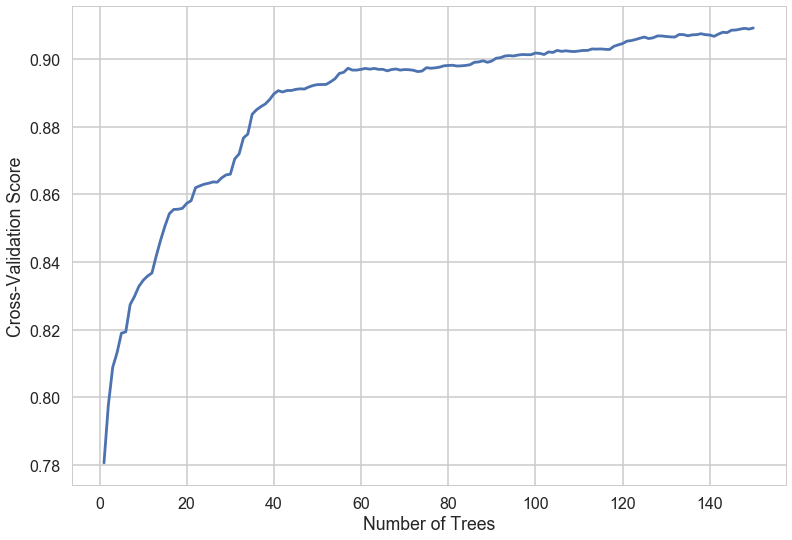

In [124]:
test_scores=[]
for spred in begb.staged_predict(X_test_complex):
    test_scores.append(metrics.accuracy_score(spred, y_test))
plt.plot(range(1, 151), test_scores)
plt.xlabel("Number of Trees")
plt.ylabel("Cross-Validation Score")

In [127]:
print ("Optimal # trees = ", np.argmax(test_scores))
print ("Optimal depth = ", 15) # from begb printout above

Optimal # trees =  149
Optimal depth =  15


In [128]:
gb_optimized = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                                  n_estimators=149, learning_rate=.08)
gb_optimized.fit(X_train_complex, y_train)

train_pred = gb_optimized.predict(X_train_complex)
test_pred = gb_optimized.predict(X_test_complex)
print()
print("Training Accuracy: " + str(accuracy_score(train_pred, y_train)))
print("Testing Accuracy: " + str(accuracy_score(test_pred, y_test)))

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,test_pred)
print("True Positive Rate: ", float(conf_mat[1][1])/(conf_mat[1][1]+ conf_mat[1][0]))
print("True Negative Rate: ", float(conf_mat[0][0])/(conf_mat[0][0] + conf_mat[0][1]))

test_pred_proba = gb_optimized.predict_proba(X_test_complex)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: ", roc_auc)


Training Accuracy: 0.990947658551
Testing Accuracy: 0.900811937678
True Positive Rate:  0.821229050279
True Negative Rate:  0.94070169659
AUC:  0.940525151682


# Part 10: Preliminary Regression Model

In [41]:
# Re-handle data for regression problem

print(len(data))
non_null_data = data.dropna(axis=0, subset=['DAMAGE_PROPERTY'], how='any')
print(len(non_null_data))
damage_data = non_null_data[non_null_data['DAMAGE_PROPERTY'] > 1.0]
# expecting ~18000
print(len(damage_data))

X = damage_data.drop('DAMAGE_PROPERTY',axis=1)
y = damage_data['DAMAGE_PROPERTY']

# drop 3 rows where household income is "infinity"
drop_indices = []
for i in range(len(X)):
    if not np.isfinite(X['HH_INCOME'].iloc[i]):
        drop_indices.append(i)

print(len(X))
X = X.drop(X.index[drop_indices])
y = y.drop(y.index[drop_indices])
print(len(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

55239
55239
18668
18668
18664


In [43]:
# BETTER SELECTION OF PREDICTORS
full_cols = ['BEGIN_TIME', 'CZ_TYPE', 'YEAR',
             'WFO', 'EVENT_TYPE', 'MONTH_NAME',
             'AZIMUTH', 'DENSITY', 'POPULATION', 'HH_INCOME']
X_train_reg = X_train[full_cols]
X_test_reg = X_test[full_cols]

# normalize the numerical predictors
for i in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    train_mean = X_train_reg[i].mean()
    train_sd = X_train_reg[i].std()
    X_train_reg[i] = (X_train_reg[i] - train_mean) / train_sd
    X_test_reg[i] = (X_test_reg[i] - train_mean) / train_sd

X_train_reg = pd.get_dummies(X_train_reg, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)
X_test_reg = pd.get_dummies(X_test_reg, columns=['MONTH_NAME', 'WFO', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'AZIMUTH'], drop_first=True)

#print(len(list(X_train_reg.columns)))
#print(len(list(X_test_reg.columns)))

s = set(list(X_train_reg.columns))
diff = [x for x in list(X_test_reg.columns) if x not in s]

X_test_reg = X_test_reg.drop(labels=diff, axis=1)

s = set(list(X_test_reg.columns))
diff = [x for x in list(X_train_reg.columns) if x not in s]

X_train_reg = X_train_reg.drop(labels=diff, axis=1)

#print(len(list(X_train_reg.columns)))
#print(len(list(X_test_reg.columns)))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [48]:
y_train2 = np.log(y_train)
y_test2 = np.log(y_test)

model_base = LinearRegression()
model_base.fit(X_train_reg, y_train2)

train_pred = model_base.predict(X_train_reg)
test_pred = model_base.predict(X_test_reg)

print()
print("Training Accuracy: " + str(model_base.score(X_train_reg,y_train2)))
print("Testing Accuracy: " + str(model_base.score(X_test_reg,y_test2)))


Training Accuracy: 0.431650202073
Testing Accuracy: 0.431797688817


# Part 11:  Improving Regression Model

In [71]:
X_train_reg_complex = copy.deepcopy(X_train_reg)
X_test_reg_complex = copy.deepcopy(X_test_reg)


# hardcode interaction term
for event_type in ['EVENT_TYPE_Dust Devil', 'EVENT_TYPE_Flash Flood', 'EVENT_TYPE_Flood', 'EVENT_TYPE_Hail', 
                   'EVENT_TYPE_Heavy Rain', 'EVENT_TYPE_Lightning', 'EVENT_TYPE_Marine Strong Wind',
       'EVENT_TYPE_Thunderstorm Wind', 'EVENT_TYPE_Tornado', 'EVENT_TYPE_Waterspout']:
    X_train_reg_complex[event_type + "*MAGNITUDE"] = X_train_reg_complex[event_type]*X_train["MAGNITUDE"]
    X_test_reg_complex[event_type + "*MAGNITUDE"] = X_test_reg_complex[event_type]*X_test["MAGNITUDE"]
    
X_train_reg_complex["HH_INCOME*DENSITY"] = X_train_reg_complex["DENSITY"]*X_train_reg_complex["HH_INCOME"]
X_train_reg_complex["HH_INCOME*POPULATION"] = X_train_reg_complex["POPULATION"]*X_train_reg_complex["HH_INCOME"]
X_train_reg_complex["DENSITY*POPULATION"] = X_train_reg_complex["POPULATION"]*X_train_reg_complex["DENSITY"]
X_test_reg_complex["HH_INCOME*DENSITY"] = X_test_reg_complex["DENSITY"]*X_test_reg_complex["HH_INCOME"]
X_test_reg_complex["HH_INCOME*POPULATION"] = X_test_reg_complex["POPULATION"]*X_test_reg_complex["HH_INCOME"]
X_test_reg_complex["DENSITY*POPULATION"] = X_test_reg_complex["POPULATION"]*X_test_reg_complex["DENSITY"]

for quant in ['BEGIN_TIME', 'DENSITY', 'POPULATION', 'HH_INCOME']:
    X_train_reg_complex[quant + "2"] = (X_train_reg_complex[quant]) ** 2
    X_test_reg_complex[quant + "2"] = (X_test_reg_complex[quant]) ** 2

In [73]:
model_complex = LinearRegression()
model_complex.fit(X_train_reg_complex, y_train2)

train_pred = model_complex.predict(X_train_reg_complex)
test_pred = model_complex.predict(X_test_reg_complex)

print("Training Accuracy: " + str(model_complex.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(model_complex.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.474418140789
Testing Accuracy: 0.469550842239


In [97]:
diff = abs(test_pred - y_test2)
diffs = []
for i in diff:
    diffs.append(math.exp(i))
print("Mean Absolute Value Error: {}".format(np.mean(diffs)))
print("SD Absolute Value Error: {}".format(np.std(diffs)))

Mean Absolute Value Error: 41.04277796222084
SD Absolute Value Error: 1436.011567378967


#### Plot residuals

### Regularization

In [76]:
lambdas = [.001,.005,1,5,10,50,100,500,1000]
ridge = RidgeCV(cv=5, alphas=lambdas, fit_intercept=True, normalize=True)
ridge.fit(X_train_reg_complex,y_train2)

print("Training Accuracy: " + str(ridge.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(ridge.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.473769508663
Testing Accuracy: 0.469292299256


In [77]:
lasso = LassoCV(cv=5, alphas=lambdas, fit_intercept=True, normalize=True)
lasso.fit(X_train_reg_complex,y_train2)

print("Training Accuracy: " + str(lasso.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(lasso.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.3337052492
Testing Accuracy: 0.328269072598


### k-NN

In [80]:
knn_reg = KNeighborsRegressor(n_neighbors=15)
knn_reg.fit(X_train_reg_complex,y_train2)

print("Training Accuracy: " + str(knn_reg.score(X_train_reg_complex,y_train2)))
print("Testing Accuracy: " + str(knn_reg.score(X_test_reg_complex,y_test2)))

Training Accuracy: 0.526442438159
Testing Accuracy: 0.44326243361


### Random Forest Regressor

# Part 12: Model Analysis and Presentation